# Deutsch-Jozsa Algorithm

In [8]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [9]:
import numpy as np
import qiskit
from qiskit import visualization, QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
%matplotlib inline
from math import pi
from Circuits import getBloch, stateGenerator, getMeasure
import random

In [10]:
backend = Aer.get_backend('statevector_simulator')

In [11]:
def makeCirc(n, state):
    initState = state
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [12]:
def analyse(circ):
    for i in range(0, 2):
        circ.h(i)
    circ.barrier()
    
    getOracle = random.randint(0, 3)
    circ2 = QuantumCircuit(2)
    if(getOracle == 0):
        #f(x) = 0
        print("Constant")
        pass
    elif(getOracle==1):
        #f(x) = x
        print("Balanced")
        circ2.cx(0, 1)
    elif(getOracle==2):
        #f(x) = 1
        print("Constant")
        circ2.cx(0, 1)
        circ2.x(0)
        circ2.cx(0, 1)
    else:
        #f(x) = x + 1
        print("Balanced")
        circ2.x(0)
        circ2.cx(0, 1)
    gate = circ2.to_gate(label = ' Oracle')
    circ.append(gate, [0, 1])
    circ.barrier()
    
    for i in range(0, 2):
        circ.h(i)
    for i in range(0, 1):
        circ.measure(i, i)
    return circ
    

In [14]:
circ = makeCirc(2, '01')
circ2 = analyse(circ)
getMeasure(circ2, 1, backend)[0][1]

01
Balanced


'1'

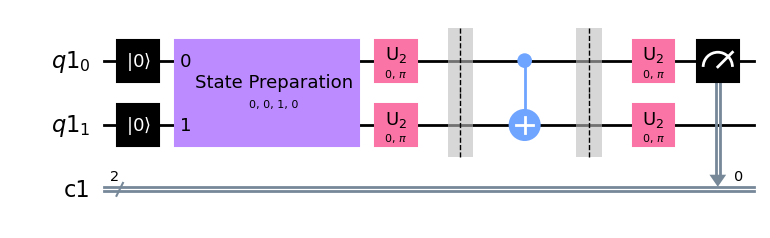

In [15]:
circ2.decompose().draw('mpl')